# 🛳️ TITANIC SURVIVAL PREDICTION - BASE PARA ESTUDO

Este projeto utiliza dados do desastre do Titanic para prever quais passageiros teriam sobrevivido, usando algoritmos de machine learning.

## ✅ Objetivos
- Aplicar técnicas de pré-processamento
- Treinar e avaliar modelos preditivos
- Comparar performance entre modelos

## 📊 Modelos testados
- Regressão Logística
- Random Forest

## 📁 Dataset
[Titanic - Kaggle](https://www.kaggle.com/c/titanic/data)

## 🛠️ Tecnologias
- Python
- Pandas, Scikit-learn, Seaborn

In [11]:
# 1. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Carregando os dados
df = pd.read_csv('../files/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


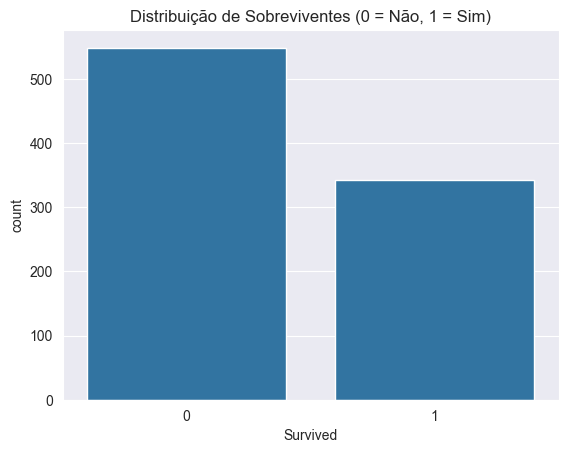

In [12]:
# 3. Análise exploratória
df.info()
df.describe()
df.isnull().sum()

# Visualizando a distribuição de sobreviventes
sns.countplot(x='Survived', data=df)
plt.title('Distribuição de Sobreviventes (0 = Não, 1 = Sim)')
plt.show()


In [13]:
# 4. Tratando dados faltantes
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 5. Removendo colunas desnecessárias
df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [14]:
# 6.Codigicar variáveis categóricas
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [15]:
# 7. Separando variáveis dependentes e independentes
X = df.drop(columns=['Survived'])
y = df['Survived']

# 8. Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 9. Treinamento do modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [18]:
# 11. Testando outro modelo
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Classifier Accuracy: 0.8044692737430168
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Conclusão

Para esse caso, observando as métricas de precisão, o modelo de Regressão Logística teve um desempenho geral melhor que o Random Forest. No entanto, ambos os modelos de estudo (apenas didático) apresentam, segundo a confusion matrix, uma precisão maior para negativos que para positivos.